In [1]:
from func_lib import plot_srim_vs_geant4
from read_geant4 import Geant4Result
from simulation import load_sim_result, SimulationResult, Simulation, save_sim_result
from config import PICKLE_DIR, DATA_DIR
import matplotlib.pyplot as plt

num_points = 51




#### Simulate in SRIM and save

In [8]:
num_points = 51
energy = 15e6
num_events = 100
srim_result = Simulation("He", 4, energy, num_events, energy / num_points).run()
save_sim_result(srim_result)

energy = 300e6
srim_result = Simulation("Ne", 20, energy, num_events, energy / num_points).run()
save_sim_result(srim_result)

print(srim_result.exyz_file_name)

EXYZ_Ne20-300.0MeV_2023-05-04_1738.txt


#### Plot Geant4 average/ SRIM ioniz 

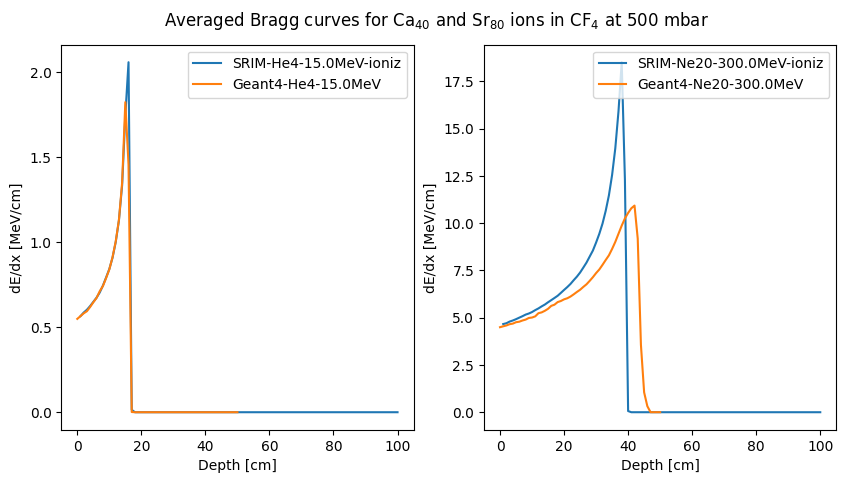

In [25]:
GEANT4_FILE_NAMES = ["He4_15MeV_100_events_CF4_500mbar_train.txt", "Ne20_300MeV_100_events_CF4_500mbar_train.txt"]
PICKLE_FILE_NAMES = ["He4-15.0MeV.pickle", "Ne20-300.0MeV.pickle"]
file_names = zip(GEANT4_FILE_NAMES, PICKLE_FILE_NAMES)

num_plots = len(GEANT4_FILE_NAMES)
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
for i, file_pair in enumerate(tuple(file_names)):
    geant4_file_name, pickle_file_name = file_pair
    srim_result: SimulationResult = load_sim_result(f"{PICKLE_DIR}/{pickle_file_name}")
    geant4_result: Geant4Result = Geant4Result.from_file_name(geant4_file_name, DATA_DIR)

    ax = ax if num_plots == 1 else axs[i]
    srim_result.plot(ax, num_events=1, exyz=False, ioniz=True)
    geant4_result.plot_average(ax)
    ax.legend()
    ax.set_xlabel("Depth [cm]")
    ax.set_ylabel("dE/dx [MeV/cm]")
fig.suptitle("Averaged Bragg curves for Ca$_{40}$ and Sr$_{80}$ ions in CF$_4$ at $500$ mbar", y=0.95)

plt.show()


#### Simulate some stuff and save in pickle files

In [4]:
num_points = 51
energy = 600e6
num_events = 50
srim_result = Simulation("Ca", 40, energy, num_events, energy / num_points).run()
save_sim_result(srim_result)

energy = 1200e6
srim_result = Simulation("Sr", 80, energy, num_events, energy / num_points).run()
save_sim_result(srim_result)

#### Plot Geant4 average / SRIM ioniz for Ca40 and Sr80

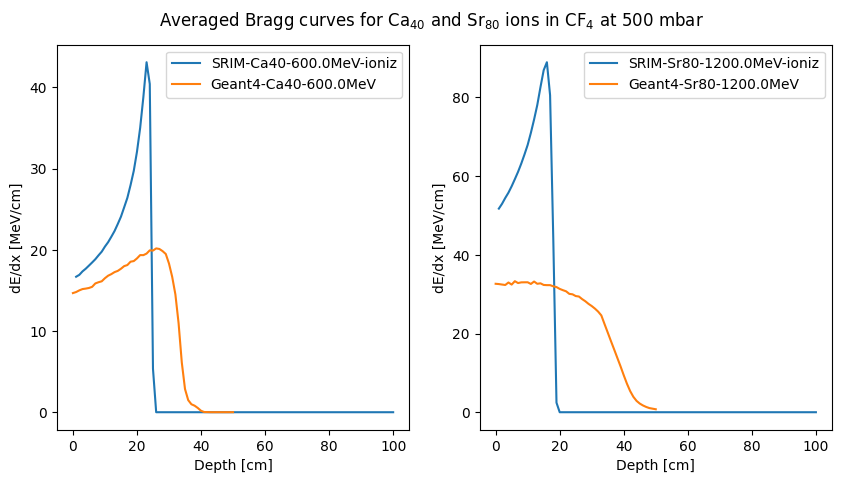

In [23]:
GEANT4_FILE_NAMES = ["Ca40_600MeV_100_events_CF4_500mbar_train.txt", "Sr80_1200MeV_100_events_CF4_500mbar_train.txt"]
PICKLE_FILE_NAMES = ["Ca40-600.0MeV.pickle", "Sr80-1200.0MeV.pickle"]
file_names = zip(GEANT4_FILE_NAMES, PICKLE_FILE_NAMES)

num_plots = len(GEANT4_FILE_NAMES)
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
for i, file_pair in enumerate(tuple(file_names)):
    geant4_file_name, pickle_file_name = file_pair
    srim_result: SimulationResult = load_sim_result(f"{PICKLE_DIR}/{pickle_file_name}")
    geant4_result: Geant4Result = Geant4Result.from_file_name(geant4_file_name, DATA_DIR)

    ax = ax if num_plots == 1 else axs[i]
    srim_result.plot(ax, num_events=1, exyz=False, ioniz=True)
    geant4_result.plot_average(ax)
    ax.legend()
    ax.set_xlabel("Depth [cm]")
    ax.set_ylabel("dE/dx [MeV/cm]")
fig.suptitle("Averaged Bragg curves for Ca$_{40}$ and Sr$_{80}$ ions in CF$_4$ at $500$ mbar", y=0.95)
plt.show()

#### Plot exyz He4 vs Ne20

c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dE"] = df["Energy"].diff()
c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dx"] = df["Depth"].diff()
c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

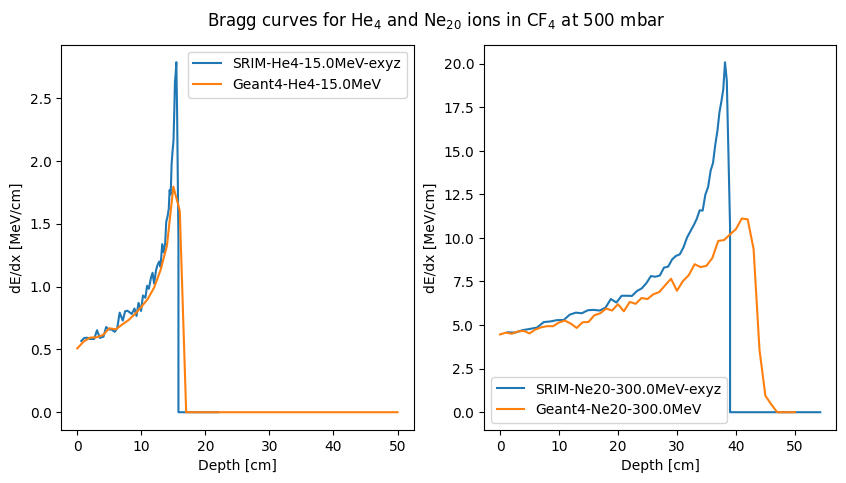

In [32]:
GEANT4_FILE_NAMES = ["He4_15MeV_100_events_CF4_500mbar_train.txt", "Ne20_300MeV_100_events_CF4_500mbar_train.txt"]
PICKLE_FILE_NAMES = ["He4-15.0MeV.pickle", "Ne20-300.0MeV.pickle"]
file_names = zip(GEANT4_FILE_NAMES, PICKLE_FILE_NAMES)

num_plots = len(GEANT4_FILE_NAMES)
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
for i, file_pair in enumerate(tuple(file_names)):
    geant4_file_name, pickle_file_name = file_pair
    srim_result: SimulationResult = load_sim_result(f"{PICKLE_DIR}/{pickle_file_name}")
    geant4_result: Geant4Result = Geant4Result.from_file_name(geant4_file_name, DATA_DIR)

    ax = ax if num_plots == 1 else axs[i]
    srim_result.plot(ax, num_events=1, exyz=True, ioniz=False)
    geant4_result.plot(ax, num_events=1)
    ax.legend()
    ax.set_xlabel("Depth [cm]")
    ax.set_ylabel("dE/dx [MeV/cm]")
fig.suptitle("Bragg curves for He$_{4}$ and Ne$_{20}$ ions in CF$_4$ at $500$ mbar", y=0.95)
plt.show()

#### Plot exyz Ca40 vs Sr80

Ca40_600MeV_100_events_CF4_500mbar_train.txt Ca40-600.0MeV.pickle


c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dE"] = df["Energy"].diff()
c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dx"] = df["Depth"].diff()
c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Sr80_1200MeV_100_events_CF4_500mbar_train.txt Sr80-1200.0MeV.pickle


c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dE"] = df["Energy"].diff()
c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dx"] = df["Depth"].diff()
c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

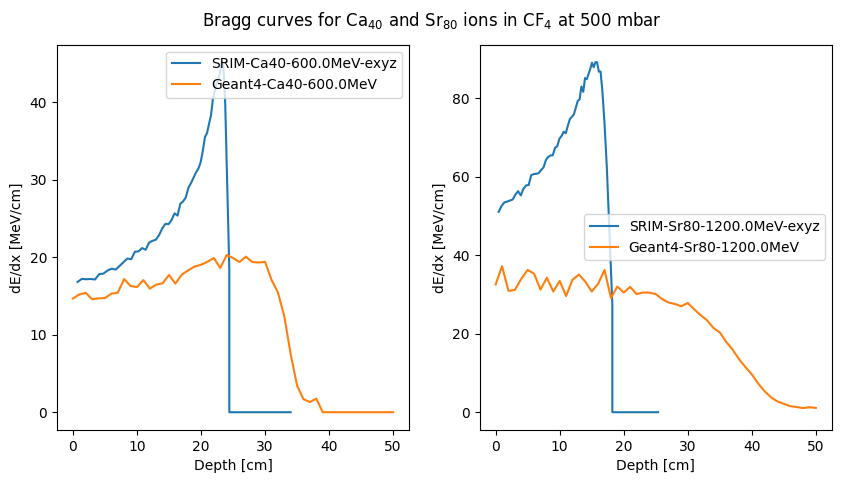

In [33]:
GEANT4_FILE_NAMES = ["Ca40_600MeV_100_events_CF4_500mbar_train.txt", "Sr80_1200MeV_100_events_CF4_500mbar_train.txt"]
PICKLE_FILE_NAMES = ["Ca40-600.0MeV.pickle", "Sr80-1200.0MeV.pickle"]
file_names = zip(GEANT4_FILE_NAMES, PICKLE_FILE_NAMES)

num_plots = len(GEANT4_FILE_NAMES)
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
for i, file_pair in enumerate(tuple(file_names)):
    geant4_file_name, pickle_file_name = file_pair
    print(geant4_file_name, pickle_file_name)
    srim_result: SimulationResult = load_sim_result(f"{PICKLE_DIR}/{pickle_file_name}")
    geant4_result: Geant4Result = Geant4Result.from_file_name(geant4_file_name, DATA_DIR)

    ax = ax if num_plots == 1 else axs[i]
    srim_result.plot(ax, num_events=1, exyz=True, ioniz=False)
    geant4_result.plot(ax, num_events=1)
    ax.legend()
    ax.set_xlabel("Depth [cm]")
    ax.set_ylabel("dE/dx [MeV/cm]")
fig.suptitle("Bragg curves for Ca$_{40}$ and Sr$_{80}$ ions in CF$_4$ at $500$ mbar", y=0.95)
plt.show()

#### Proton vs Deuterium exyz

In [12]:
num_points = 51
energy = 5e6
num_events = 100
srim_result = Simulation("H", 1, energy, num_events, energy / num_points).run()
save_sim_result(srim_result)

energy = 8e6
srim_result = Simulation("H", 2, energy, num_events, energy / num_points).run()
save_sim_result(srim_result)

c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dE"] = df["Energy"].diff()
c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dx"] = df["Depth"].diff()
c:\Users\jakob\OneDrive\Chalmers\3\Kandidat\kandidatarbete\Kod\kod\simulation.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

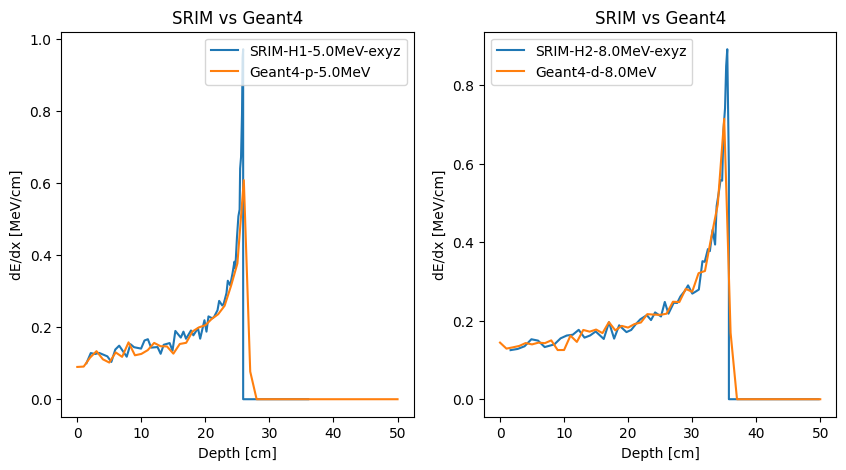

In [4]:
GEANT4_FILE_NAMES = ["p_5MeV_100_events_CF4_500mbar_train.txt", "d_8MeV_100_events_CF4_500mbar_train.txt"]
PICKLE_FILE_NAMES = ["H1-5.0MeV.pickle", "H2-8.0MeV.pickle"]
file_names = zip(GEANT4_FILE_NAMES, PICKLE_FILE_NAMES)

num_plots = len(GEANT4_FILE_NAMES)
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
for i, file_pair in enumerate(tuple(file_names)):
    geant4_file_name, pickle_file_name = file_pair
    srim_result: SimulationResult = load_sim_result(f"{PICKLE_DIR}/{pickle_file_name}")
    geant4_result: Geant4Result = Geant4Result.from_file_name(geant4_file_name, DATA_DIR)

    ax = ax if num_plots == 1 else axs[i]
    srim_result.plot(ax, num_events=1, exyz=True, ioniz=False)
    # srim_result.plot(ax, num_events=1, exyz=False, ioniz=True)
    geant4_result.plot(ax, num_events=1)
    ax.legend()
    ax.set_xlabel("Depth [cm]")
    ax.set_ylabel("dE/dx [MeV/cm]")
    ax.set_title(f"SRIM vs Geant4")
plt.show()

#### Plot average

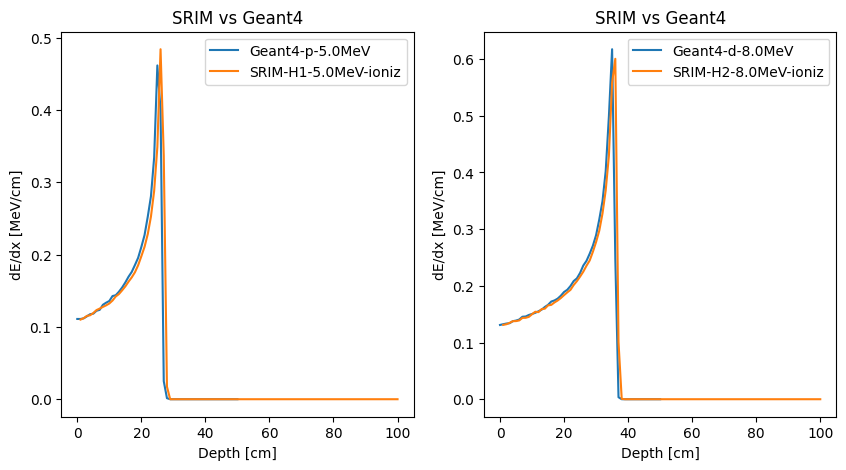

In [3]:
GEANT4_FILE_NAMES = ["p_5MeV_100_events_CF4_500mbar_train.txt", "d_8MeV_100_events_CF4_500mbar_train.txt"]
PICKLE_FILE_NAMES = ["H1-5.0MeV.pickle", "H2-8.0MeV.pickle"]
file_names = zip(GEANT4_FILE_NAMES, PICKLE_FILE_NAMES)

num_plots = len(GEANT4_FILE_NAMES)
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
for i, file_pair in enumerate(tuple(file_names)):
    geant4_file_name, pickle_file_name = file_pair
    srim_result: SimulationResult = load_sim_result(f"{PICKLE_DIR}/{pickle_file_name}")
    geant4_result: Geant4Result = Geant4Result.from_file_name(geant4_file_name, DATA_DIR)

    ax = ax if num_plots == 1 else axs[i]
    # srim_result.plot(ax, num_events=1, exyz=True, ioniz=False)
    geant4_result.plot_average(ax)
    srim_result.plot(ax, num_events=1, exyz=False, ioniz=True)
    ax.legend()
    ax.set_xlabel("Depth [cm]")
    ax.set_ylabel("dE/dx [MeV/cm]")
    ax.set_title(f"SRIM vs Geant4")
plt.show()